In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import *
from sklearn import preprocessing
import xgboost as xgb
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostClassifier

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPool2D, GRU, InputLayer
from tensorflow.keras.losses import MeanSquaredError
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import seaborn as sns

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ModuleNotFoundError: No module named 'catboost'

In [2]:
train = pd.read_csv("Liver_disease_data.csv")

In [3]:
train.head()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1


In [4]:
for column in train:
    print(f"Column {column}: {train[column].isnull().sum()} null values/type:",train[column].dtype)

Column Age: 0 null values/type: int64
Column Gender: 0 null values/type: int64
Column BMI: 0 null values/type: float64
Column AlcoholConsumption: 0 null values/type: float64
Column Smoking: 0 null values/type: int64
Column GeneticRisk: 0 null values/type: int64
Column PhysicalActivity: 0 null values/type: float64
Column Diabetes: 0 null values/type: int64
Column Hypertension: 0 null values/type: int64
Column LiverFunctionTest: 0 null values/type: float64
Column Diagnosis: 0 null values/type: int64


In [5]:
train = train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(train)
train = pd.DataFrame(x_scaled)

In [6]:
train

,0,1,2,3,4,5,6,7,8,9,10
0,0.633333,0.0,0.834511,0.865674,0.0,0.5,0.065754,0.0,0.0,0.284036,1.0
1,0.850000,1.0,0.629409,0.110159,0.0,0.5,0.166986,1.0,0.0,0.591338,1.0
2,0.466667,0.0,0.198762,0.927238,0.0,0.0,0.993330,0.0,0.0,0.546687,0.0
3,0.233333,1.0,0.064459,0.633080,0.0,0.0,0.563216,0.0,0.0,0.556902,1.0
4,0.700000,1.0,0.042465,0.054344,0.0,0.5,0.356682,1.0,0.0,0.723370,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1695,0.366667,0.0,0.940190,0.720896,0.0,0.5,0.099112,0.0,0.0,0.974273,1.0
1696,0.333333,0.0,0.504055,0.272061,0.0,0.0,0.839442,0.0,0.0,0.628235,1.0
1697,0.300000,0.0,0.949463,0.316841,1.0,1.0,0.931879,0.0,1.0,0.450583,1.0
1698,0.783333,0.0,0.833039,0.846956,0.0,1.0,0.322482,0.0,0.0,0.078548,1.0


In [7]:
X=train.loc[:,0:9]
Y=train.loc[:,10]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.15, random_state=42)

In [9]:
model = xgb.XGBClassifier()

#Training the model on the training data
model.fit(X_train, y_train)

#Making predictions on the test set
y_pred = model.predict(X_test)

In [10]:
cm = confusion_matrix(y_test,y_pred)

In [11]:
cm

array([[168,  25],
       [ 27, 205]])

<Axes: >

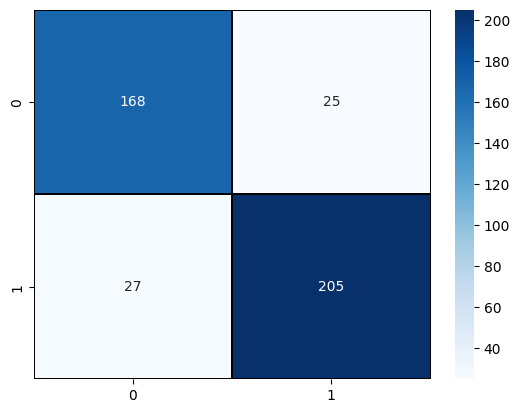

In [12]:
sns.heatmap(cm,annot=True,fmt='g',linewidth=0.1,linecolor='black',xticklabels=['0','1'],yticklabels=['0','1'],
            cmap="Blues")

In [13]:
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.8767126344445932
0.8764214046822743
0.8770435054493478


In [14]:
lgbm = LGBMClassifier(metric='auc') 
lgbm.fit(X_train, y_train) 
y_pred = lgbm.predict(X_test) 

[LightGBM] [Info] Number of positive: 704, number of negative: 571
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1092
[LightGBM] [Info] Number of data points in the train set: 1275, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.552157 -> initscore=0.209389
[LightGBM] [Info] Start training from score 0.209389


In [15]:
cm = confusion_matrix(y_test,y_pred)

In [16]:
cm

array([[167,  26],
       [ 23, 209]])

<Axes: >

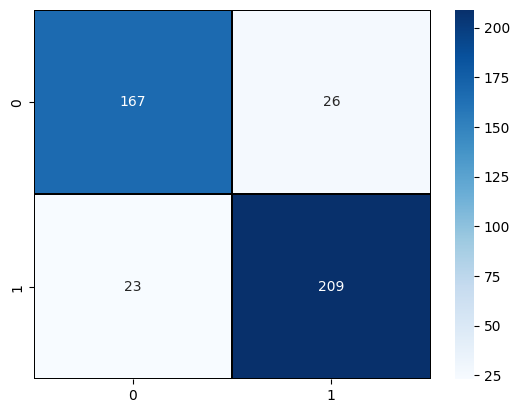

In [17]:
sns.heatmap(cm,annot=True,fmt='g',linewidth=0.1,linecolor='black',xticklabels=['0','1'],yticklabels=['0','1'],
            cmap="Blues")

In [18]:
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.8835688048260939
0.8841545352743561
0.8830735215293908


In [19]:
catc = CatBoostClassifier(learning_rate=0.01) 
catc.fit(X_train, y_train) 
y_pred = catc.predict(X_test) 

0:	learn: 0.6845925	total: 55.9ms	remaining: 55.9s
1:	learn: 0.6774211	total: 58.3ms	remaining: 29.1s
2:	learn: 0.6706151	total: 60.3ms	remaining: 20s
3:	learn: 0.6632894	total: 62.2ms	remaining: 15.5s
4:	learn: 0.6568031	total: 64.1ms	remaining: 12.8s
5:	learn: 0.6495235	total: 65.8ms	remaining: 10.9s
6:	learn: 0.6431300	total: 67.6ms	remaining: 9.59s
7:	learn: 0.6364196	total: 69.3ms	remaining: 8.59s
8:	learn: 0.6295746	total: 71.2ms	remaining: 7.83s
9:	learn: 0.6240442	total: 72.9ms	remaining: 7.22s
10:	learn: 0.6186370	total: 74.6ms	remaining: 6.71s
11:	learn: 0.6124251	total: 76.3ms	remaining: 6.29s
12:	learn: 0.6066291	total: 78.1ms	remaining: 5.93s
13:	learn: 0.6004861	total: 79.9ms	remaining: 5.63s
14:	learn: 0.5956512	total: 81.6ms	remaining: 5.36s
15:	learn: 0.5898793	total: 83.3ms	remaining: 5.12s
16:	learn: 0.5859591	total: 85.8ms	remaining: 4.96s
17:	learn: 0.5794809	total: 88.7ms	remaining: 4.84s
18:	learn: 0.5743444	total: 90.6ms	remaining: 4.68s
19:	learn: 0.5698961	tot

In [20]:
cm = confusion_matrix(y_test,y_pred)

<Axes: >

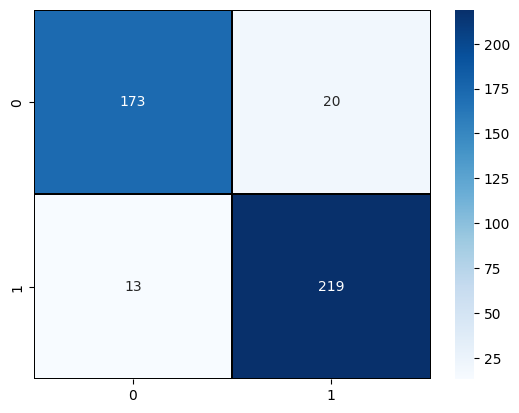

In [21]:
sns.heatmap(cm,annot=True,fmt='g',linewidth=0.1,linecolor='black',xticklabels=['0','1'],yticklabels=['0','1'],
            cmap="Blues")

In [22]:
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.9214325328134715
0.9232127592567598
0.920169287118099


In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.15, random_state=42)

In [24]:
model = Sequential()

# The Input Layer :
#model.add(InputLayer(shape=(X_train.shape[1],)))
model.add(Dense(10, kernel_initializer='normal',input_dim = 10, activation='relu'))
#model.add(GRU(64, activation='relu', return_sequences=True))
# The Hidden Layers :
model.add(Dense(8, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(16, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(8, kernel_initializer='normal',activation='relu'))
model.add(Dense(4, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))

# Compile the network :
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 239 (956.00 B)

 Trainable params: 239 (956.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [26]:
lr_reducer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=2, min_lr=10e-7, cooldown=1, verbose=1)
early_stopper = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1)
callbacks= [lr_reducer, early_stopper]

In [27]:
X_train.shape

(1445, 10)

In [28]:
history=model.fit(X_train,y_train,batch_size=16,epochs=200,validation_data=(X_val,y_val),callbacks=callbacks)
#validation_data=(X_val,y_val)

Epoch 1/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5640 - loss: 0.6924 - val_accuracy: 0.5176 - val_loss: 0.6903 - learning_rate: 0.0010
Epoch 2/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5649 - loss: 0.6808 - val_accuracy: 0.5176 - val_loss: 0.6764 - learning_rate: 0.0010
Epoch 3/200
67/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5757 - loss: 0.6504
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5719 - loss: 0.6499 - val_accuracy: 0.5176 - val_loss: 0.6524 - learning_rate: 0.0010
Epoch 4/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5492 - loss: 0.6409 - val_accuracy: 0.5373 - val_loss: 0.6466 - learning_rate: 2.0000e-04
Epoch 5/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5850 - loss: 0.6262 - val_accuracy: 0.5373 - val_loss: 0.6411 - learning_rate: 2.0000e-04
Epoch 6/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6060 - loss: 0.6146 - 

In [29]:
y_pred = model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [30]:
#y_pred

In [31]:
y_pred=np.rint(y_pred)

In [32]:
#y_pred

In [33]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

In [34]:
cm

array([[120,  73],
       [ 33, 199]])

<Axes: >

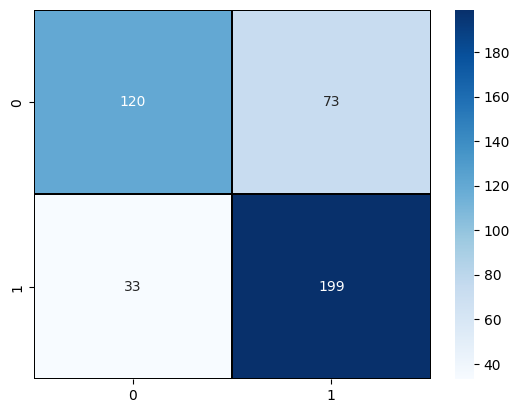

In [35]:
sns.heatmap(cm,annot=True,fmt='g',linewidth=0.1,linecolor='black',xticklabels=['0','1'],yticklabels=['0','1'],
            cmap="Blues")

In [36]:
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.7416620790898247
0.7579656862745098
0.7397601393603717


Best performance with catboost with 92 F1 score